# Logistic Regression
[COMP20121 Machine Learning for Data Analytics](https://sites.google.com/site/hejunhomepage/Teaching/machine-learning-for-data-analytics)

Author: Jun He 

## Learning objectives
* What is logistic regression?
* How to implement logistic regression for classification with Python? 
* How to understand logistic regression? 

In [ ]:
#import Python libraries used in this lecture
import pandas as pd 
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
import numpy as np

## Part 1 What is Logistic Regression?
### Classification example 
* Disease presence or not 
    * A data set includes 20 patients
    * A binary classification problem: decide the presence/absence of disease  based on patients’ age
* Target (response) variable: `disease(y)` 
    * 0 standing for no
    * 1 for yes
* Predicator: `Age(x)` with numerical values in the range [25, 84] 

In [ ]:
df = pd.read_csv("../input/lecture8data1/data13.1.csv", usecols =['Age(x)','Disease(y)']) # use selected columns
df

### Exploratory data analysis  
* Understand potential relationship between patient age and presence/absence of disease
* Use Seaborn scatterplot `Age(x)` and `Disease(y)`
* Finding:
    * the older, the more likely presence of disease
    * the younger, the more likely absence of disease 


In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x='Age(x)', y='Disease(y)')

### Logistic Regression Model
* Model: 
    * Logistic regression is to find a S-shape curve between predictor (`Age(x)`) and target variable (`Disease(y)`) based on observations
* Logistic regression curve is represented by a function 
    $$ \pi(x) = \frac{e^{\beta_0 +\beta_1 x}}{1+e^{\beta_0 +\beta_1 x}}$$ 
    * $\beta_0, \beta_1$ are two parameters which determines the shape of the curve. They values are automatically learned by the model (not hyperparameter)
    * $\beta_0$ is an intercept
    * $\beta_1$ is a weight on the input: explained in Part 3
    * $e$ is Euler's constant = $2.71828182845904523536\cdots$
  
* The value $\pi(x)$ is explained as the probability with the disease for record $x$
    * The higher $\pi(x)$, the more likely disease, while the smaller $\pi(x)$, the less likely disease
    * For example, given a patient with $age =50$, $\pi(50) = 0.025$ means the probability of the patient with the disease presence = 0.025 or 2.5% 

In [ ]:
sns.regplot(data=df, x='Age(x)', y='Disease(y)', logistic=True,ci=None)

### Review: Mathematical Functions
* A mathematical function is written in the form $y=f(x_1, \cdots, x_n)$
    * For example, $ y =(x_1)^2 + (x_2)^2+3$
    * $x_1, \cdots, x_n$ are  **independent variables** (input) with numerical values
    * $y$ is a **dependent variable** (output) with numerical values.
* A machine learning model can be regarded as a function
    * input values of $n$ predictors (features) $x_1, \cdots, x_n$
    * output a class label $y$
    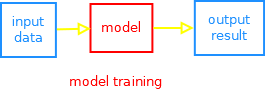

### Review: Probability
|<img src ="https://mrnussbaum.com/uploads//ed416974dd9ab7cc138f9baae013f541.jpg" width =300>|
|:--:|
|[Probability](https://mrnussbaum.com/uploads//ed416974dd9ab7cc138f9baae013f541.jpg)||


* **Probability** describes how likely an event is to occur
    * For example, $P(red)$ denotes the probability of the event $red$ occurs
* The probability of an event takes a value between 0 and 1
    * 0 means the event will not happen 
    * 1 means the event always happen
    * The higher the probability of an event, the more likely it is that the event will occur 
* Conditional probability
    * refers to the probability of one event occurring with some relationship to one or more other events
    * For example, $P(red \mid blue)$ refers to the probability of the event $red$ following an event $blue$

### Training or Fitting
* The process of finding the best logistic regression curve fitting observations is called model training or fitting 
* Question: How to derive the curve best fitting observations? Discussion in Part 3
* **Solver**: it is an optimization algorithm used for fitting the model (i.e., find the best logistic regression curve).  There are many solvers available.
    * The training is an iterative process in logistic regression
    * A solver stops search when the maximal number of iterations is reached
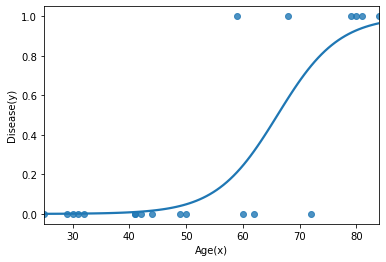

### Multi-Variate Logistic Regression
* Multi-variate logistic regression: more than one input variable $x_1, \cdots, x_n$. 
* Example: Diabetes data set
    * Several input variables: `Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction , Age`
    * One output variable: `Outcome` with two labels 0 (no diabetes) and 1 (yes diabetes)
* Multi-Variate Logistic Regression is to find the best logistic regression function between the output $y$ and input $x_1, \cdots, x_n$
$$ \pi(x) = \frac{e^{\beta_0 +\beta_1 x_1+ \cdots + \beta_n x_n}}{1+e^{\beta_0 +\beta_1 x+\cdots+\beta_n x_n}}$$
    * $\pi(x)$ is the probability of outcome being 1
    * $\beta_0$ is an intercept
    * $\beta_1, \cdots, \beta_n$ are weights on the input $x_1, \cdots, x_n$ respectively

In [ ]:
df2 = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
df2.head(5)

### Regularization
* **Overfitting** 
    * a model tends to have good performance on training data
    * but performs poorly with unseen data (or test data, not used to fit the model)
    * note: mode discussion in future lectures
* Regularization normally reduces overfitting and can significantly improve the performance of a model on unseen data.
* Regularization techniques in logistic regression
    * Idea: penalize large coefficients $\beta_0, \cdots, \beta_n$
    $$ \pi(x) = \frac{e^{\beta_0 +\beta_1 x_1+ \cdots + \beta_n x_n}}{1+e^{\beta_0 +\beta_1 x+\cdots+\beta_n x_n}}$$
    * **L1 regularization** penalizes large coefficients with the scaled sum of the absolute values of the weights: $|\beta_0|+\cdots+|\beta_n|$
    * **L2 regularization** penalizes large coefficients with the scaled sum of the squares of the weights: $|\beta_0|^2+\cdots+|\beta_n|^2$
    * **Elastic-net regularization** is a linear combination of L1 and L2 regularization.

## Part 2 Case Study: Implement Logistic Regression for Classification with Python
### Data set
* [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv):   to  predict whether or not a patient has diabetes
* In particular, all patients are females at least 21 years old of Pima Indian heritage.
* One target variable: 
    * `Outcome` 
    * 0 for no
    * 1 for yes 
* Predictor variables: 
    * `Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,	BMI, DiabetesPedigreeFunction, Age`	
* All data take numerical values


In [ ]:
df2 = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
df2.head(5)

### Exploratory data analysis
* EDA can help understand data
* Understand the relationship between two predictor variables and the target variables
* For example, scatter plot `BMI`, `Age`, and `Outcome`
* Finding 1: if  a patient is older and has a higher BMI, the more likely the disease presence
* Finding 2: Outliers: BMI value is 0 for some patients. How to handle outliers? In this case study, nothing is done to handle this issue for the sake of simplicity

In [ ]:
import seaborn as sns
sns.scatterplot(data=df2, x="BMI", y="Age", hue="Outcome")

### Prepare data
* Split dataset in predictor and target variables

In [ ]:
X = df2.iloc[:,0:8] #stop is excluded
y = df2.iloc[:,8] 

* Split dataset into training  data and test data
    * 70% records for training
    * 30% records for test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

### Build a logistic regression model
* Create a logistic regression object (classifier)
* Train the classifer on training data `fit(X_train,y_train)`
* Print parameters used in the classifier

In [ ]:
# Create LogisticRegression object
clf = LogisticRegression(max_iter =2000, solver ='liblinear',penalty='l1')
# Train LogisticRegression Classifer
clf = clf.fit(X_train,y_train)
clf.get_params()

### Parameters in Logistic Regression
* `max_iter`: the maximum number of iterations for a solver  to iterate
* `penalty`:  Used to specify penalization in regularization
    * ‘l1’, ‘l2’, ‘elasticnet’, ‘none’
* `solver`: used for fitting the model in logistic regression
    * For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
    * ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
    * ‘liblinear’ and ‘saga’ also handle L1 penalty
    * ‘saga’ also supports ‘elasticnet’ penalty
    * ‘liblinear’ does not support setting penalty='none'
* `n_job`: Number of CPU cores used when parallelizing over classes
    * -1 means using all processors 

### Evaluate the model
* Predict the label of patients in test data set
* Calculate the accuracy of prediction

In [ ]:

#Predict the response on test data
y_pred = clf.predict(X_test) 
print("predict\n", y_pred[0:3])
print("actual\n", y_test[0:3]) #output includes the index from the original data
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


* Print the probability of the first ten patietns' absence or presense of diabeties

In [ ]:
prob = clf.predict_proba(X_test)
print(prob[0:10])

### Print coefficients of the logistic regression Curve
$$ \pi(x) = \frac{e^{\beta_0 +\beta_1 x_1+ \cdots + \beta_n x_n}}{1+e^{\beta_0 +\beta_1 x+\cdots+\beta_n x_n}}$$
* Coefficients are $\beta_1, \cdots, \beta_n$
    * weights on input variables (features) `Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age`	
* Intercept: $\beta_0$

In [ ]:
df3 = pd.DataFrame(zip(X_train.columns, np.transpose(clf.coef_.tolist()[0])), columns=['features', 'coefficient']) # create a dataframe
df3 = df3.append({'features':'intercept','coefficient' : clf.intercept_.tolist()[0]}, ignore_index=True) # append a new row
df3

### Review: Zip Function in Numpy
* Join two tuples together
* Returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables

In [ ]:
a = ("A", "B", "C")
b = ("1", "2", "3")
c = zip(a, b)
print(tuple(c))

## Part 3 Explanation of Logistic Regression
### Review: Sigmoid Function
* Explanation of Logistic Regression needs some mathematical knowledge. Part 3 aims at providing a bit more complex mathematical understanding of logistic regression
* **Sigmoid function** is an important function in machine learning, with S-shaped curve or sigmoid curve.
$$
\mbox{Sigmoid}(x) = \frac{1}{1+e^{-x}} = \frac{e^{x}}{1+e^{x}}
$$
* Properties of sigmoid function:
    * S-shape with values between 0 and 1.
    * When $x \to -\infty$, $\mbox{Sigmoid}(x) \to 0$.
    * When $x \to +\infty$, $\mbox{Sigmoid}(x) \to 1$ 

In [ ]:
x = np.linspace(-6, 6, 100) 
y = 1/(1 + np.exp(-x)) 
plt.plot(x, y) 
plt.xlabel("x") 
plt.ylabel("Sigmoid") 
plt.grid(True)
plt.tight_layout()
plt.show()

### Logistic Regression Curve
* What is the logistic regression curve?
* Logistic regression curve is  a sigmoid function
$$
\pi(x) = \frac{e^{\beta_0 +\beta_1 x}}{1+e^{\beta_0 +\beta_1 x}}
$$
    * $x$ is the observed value of predictor 
    * $e$ is  a famous mathematical constant  = $2.71828182845904523536\cdots $
    * coeffcients $\beta_0, \beta_1$ controls the curve shape 

### Interpreting Logistic Regression Curve
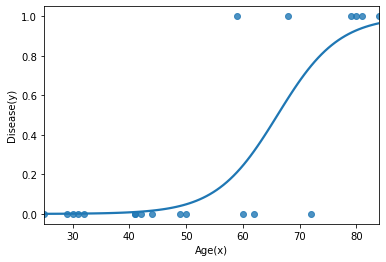
* $\pi(x)$ is interpreted as  the probability of `outcome = 1`
    * probability disease (positive outcome) present for records $x$ 
* $1 – \pi(x)$ is interpreted as the probability of `outcome = 0`
    * probability disease (positive outcome) not present  
* For the example in Part 1, $\pi(x)$ is estimated as:
$$
\pi (x) =\frac{e^{0.29*age-18.17}}{1+ e^{0.29*age-18.17}}$$
* The probability of 50-year old patient having disease is = 2.5%
$$
\pi (x) =\frac{e^{0.29*50-18.17}}{1+ e^{0.29*50-18.17}}=0.025$$

In [ ]:
import math
logbit = math.exp(0.29*50-18.17)
P = logbit/(1+logbit)
print(P) 

### Interpret Logistic Regression Model: Odds of Success
* The probability of 70-year old having disease  is 80%, and the probaility of not having disease is 1-80% = 20%
* Odds of success  is the ratio between the probabilities of positive and negative events
* Odds for 50-year old patient with disease is
$$
 \frac{\pi(x)}{1−\pi(x)}=  \frac{0.80}{1-0.80}=4
$$
    * Odds = 1 when an event just as likely to occur 50%  to 50%
    * Odds > 1, when an event more likely to occur than not
    * Odds < 1, when an event less likely to occur than not
* Probability ranges from $0$ to $1$, however odds ranges from $0$ to  $+\infty$
* Odds indicates how much more likely event occurs, versus not occurring
* Log-odds is a log-scale value of odds
$$
 \log( \frac{\pi(x)}{1−\pi(𝑥)})
$$

In [ ]:
print("probability:", 0.80)
print("odds:", 0.80/(1-0.80))
print("log-odds:", np.log(0.80/(1-0.80)))

### Interpret Coefficients in Logistic Regression Curve
* Odds of success
$$
Odds =   \frac{\pi(x)}{1−\pi(𝑥)}
$$
* Log-odds
$$
g(x) =\ln (\frac{\pi(x)}{1-\pi(x)}) = \beta_0 +\beta_1 x
$$
* Coefficient $\beta_1$ represents how much the log-odds of success changes when the input variable $x$ increases by a unit
$$
\beta_1 =g(x+1) -g(x)
$$
* Coefficient $\beta_1$ can be regarded as a weight on the input variable $x$
    * The larger $\beta_1$, the bigger weight


### Maximum Likelihood Estimation
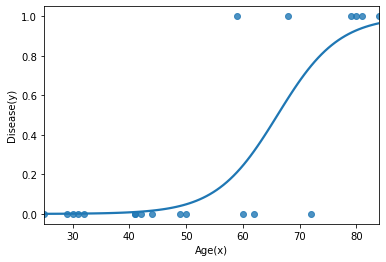
* Given some observations, logistic regression is to find parameters $\beta$     best fitting observations $X$
* **Maximum Likelihood Estimation** (MLE) is used to implement this task
* MLE is a machine learning technique for estimating parameters of a model  
* The goal of maximum likelihood estimation is to maximize  a **likelihood** function of observing the data given the model parameters $\beta$
$$ L(  \beta \mid X)$$
* We cannot discuss maximum likelihood estimation in depth in this module

### Maximum Likelihood Function for Logistic Regression
* What is the likelihood function for logistic regression?
 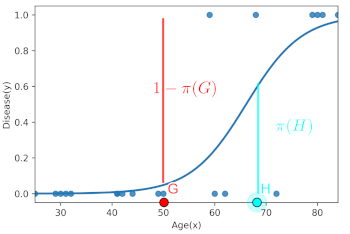
* Observation $H$ has  a probability of positive response $y=1$:	
$$\pi (H) = Prob(y=1 | H)$$
* Observation $G$ has a probability of negative response $y=0$: 
$$1 – \pi(G) = Prob(Y=0 | G)$$
* An observation  with positive response $y =1$ contributes $\pi(x) = [\pi(x)]^1$ to likelihood
* An observations with negative response $y =0$ contributes $1-\pi(x)=[1-\pi(x)]^{1-0}$ to likelihood
* As $y  =0$ or $1$, the contribution to the likelihood of the observation  $x$ is 
$$
[\pi(x )]^{y } [1-\pi(x )]^{(1-y )}
$$
* The likelihood function over $m$ observations is a product
$$
L(\beta \mid X) =   [\pi(x_1)]^{y_1} [1-\pi(x_1)]^{(1-y_1)} \times \cdots \times [\pi(x_m)]^{y_m} [1-\pi(x_m)]^{(1-y_m)}
$$


### Maximum Likelihood Estimation for Logistic Regression
* Maximum Likelihood Estimation aims at finding the parameters $\beta=(\beta_0, \beta_1)$ or $(\beta_0, \beta_1,\cdots, \beta_n)$ which maximizes the likelihood function based on $m$ observations   
$$
\max L(\beta \mid X) 
$$ 
    * $X$ are observations
    * $\beta$ are parameters to be optimised


|<img src="https://www.weibull.com/hotwire/issue148/ht148-13.png" width=300>|
|:--:|
|[A likelihood surface. The task is to find the location where the likelihood takes the maximum value.](https://www.weibull.com/hotwire/issue148/ht148-13.png)|

* Different algorithms (called **solvers**) have been proposed for searching the optimal values of $\beta$
* The search process is an iteration. So the **number of maximum iteration** is needed to stop the iteration.

## Summary
* Logistic regression is to find a sigmoid function which describes the relationship between predictor variables and target variable (binary) 
* The logistic regression function can be explained as the probability of positive response: `Outcome=1` 
* Training in logistic regression is to find a logistic regression curve best fitting observations  
* Sklean provides high-level implementation of logistic regression
* Logistic regression uses maximum likelihood estimation  